## Convolution and Input Shaping

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import integrate
from astropy.convolution import convolve

### Load Data From File

In [2]:
path = './mat_testfiles/'
fname = 'cav1-9_lambda0.mat'
fullpath = fname
data = sio.loadmat(fullpath)
zAxis = data['export'][0,0]
yAxis = data['export'][1,0]
pAxis = data['export'][2,0]
zPos = zAxis[0]
zSpd = zAxis[1]
zAcc = zAxis[2]
yPos = yAxis[0]
ySpd = yAxis[1]
yAcc = yAxis[2]
pPos = pAxis[0]
pSpd = pAxis[1]
pAcc = pAxis[2]

In [3]:
f0 = 41.493775933
T_end = 0.1390
dt = T_end/len(yAcc)
n = 1
dt, len(yAcc)

(9.992810927390367e-05, 1391)

(0.012050000000177134, 0.15105000000017715)

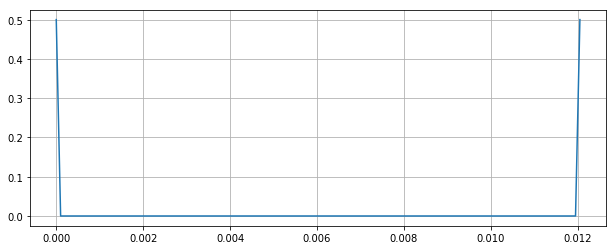

In [4]:
t1 = 0.0
t2 = 1/(2*f0)
t = np.linspace(0.0,t2,int(np.ceil(t2/dt)))
A1 = 0.5
A2 = 0.5

impulse = np.linspace(0.0, 0.0, len(t))
impulse[0] = A1
impulse[len(impulse)-1] = A2

fig=plt.figure(figsize=(8, 3))
ax=fig.add_axes([0,0,1,1])
ax.plot(t,impulse)
ax.grid()

T_end_conv = T_end+t2

t2, T_end_conv

In [5]:
def convolve_extended(array,filter):
    array_padded=np.hstack([np.zeros(len(filter))+array[0],
                            array,
                            np.zeros(len(filter))+array[len(array)-1]])
    convolced_array = np.convolve(array_padded,filter,'valid')
    return convolced_array

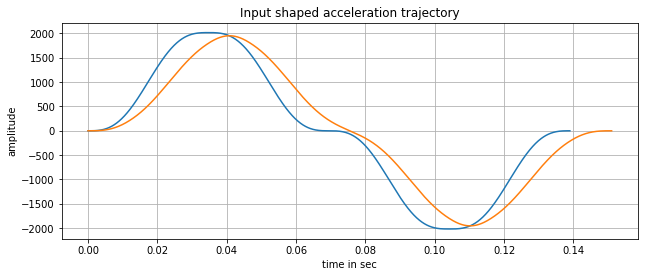

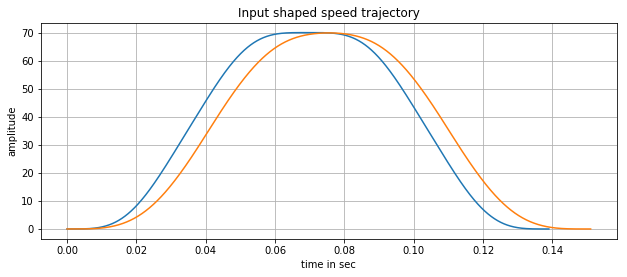

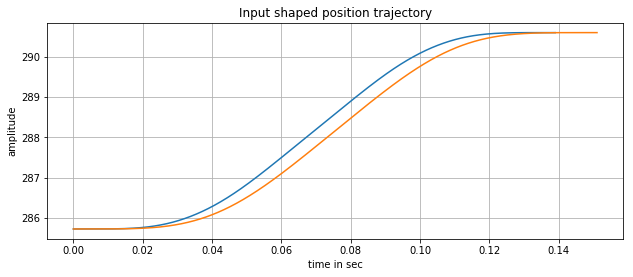

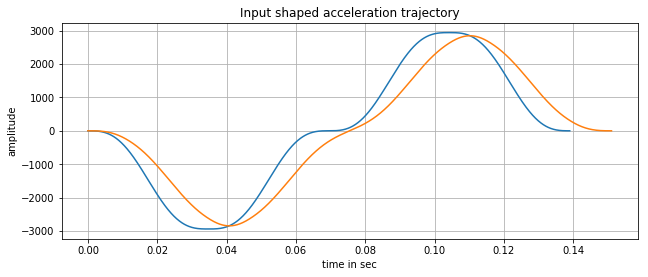

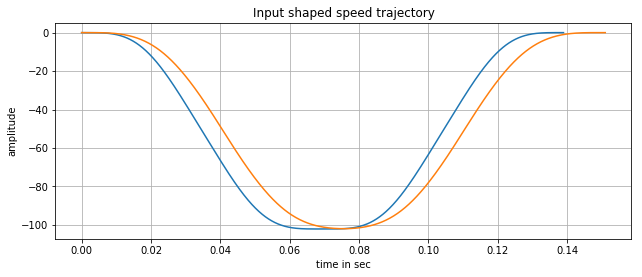

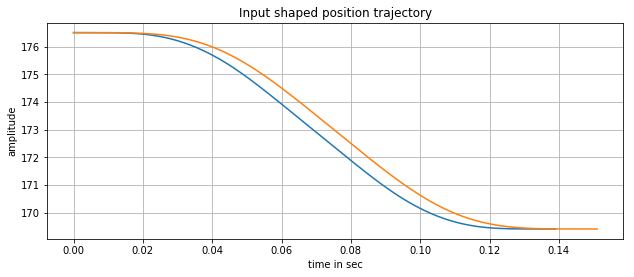

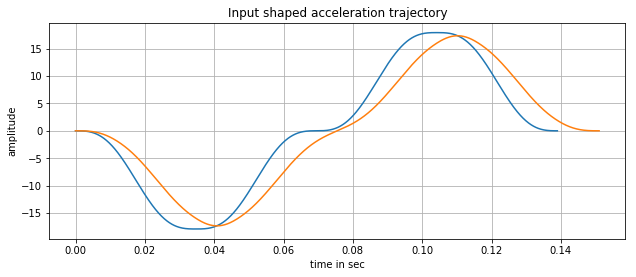

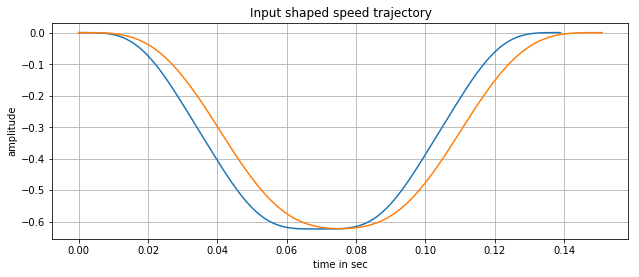

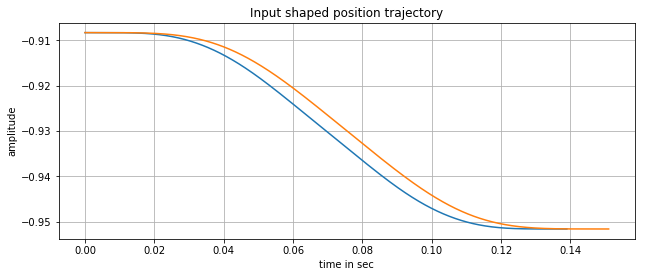

In [6]:
for k in range(0, 3):
    
    Axis = data['export'][k,0]

    Pos = Axis[0]
    Spd = Axis[1]
    Acc = Axis[2]

    Acc_shaped = convolve_extended(Acc,impulse)
    t_conv = np.linspace(0,T_end_conv, len(t)+len(Acc)+1)
    t_orig = np.linspace(0,T_end, len(Acc))

    fig=plt.figure(figsize=(8, 3))
    ax=fig.add_axes([0,0,1,1])
    ax.plot(t_orig,Acc,t_conv, Acc_shaped)
    ax.set_title('Input shaped acceleration trajectory')
    ax.set_xlabel('time in sec')
    ax.set_ylabel('amplitude')
    ax.grid()

    Spd_shaped = convolve_extended(Spd,impulse)
    fig=plt.figure(figsize=(8, 3))
    ax=fig.add_axes([0,0,1,1])
    ax.plot(t_orig,Spd,t_conv,Spd_shaped)
    ax.set_title('Input shaped speed trajectory')
    ax.set_xlabel('time in sec')
    ax.set_ylabel('amplitude')
    ax.grid()

    Pos_shaped = convolve_extended(Pos,impulse)
    fig=plt.figure(figsize=(8, 3))
    ax=fig.add_axes([0,0,1,1])
    ax.plot(t_orig,Pos,t_conv,Pos_shaped)
    ax.set_title('Input shaped position trajectory')
    ax.set_xlabel('time in sec')
    ax.set_ylabel('amplitude')
    ax.grid()
    
    Axis_shaped = np.array([Pos_shaped,Spd_shaped,Acc_shaped])
    data['export'][k,0] = Axis_shaped

### Save input shaped trajectory to .mat file

In [7]:
fname_sav = 'input_shaped_' + fname
sio.savemat(fname_sav,data)